In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airport.csv')
del df["time_of_day"]
del df["booth_rate"]

In [3]:
df["us"] = df["us_avg_wait"]
df["non_us"] = df["non_us_avg_wait"]

In [4]:
df['label'] = 0
for index, row in df.iterrows():
    if row['all_avg_wait']>15:
        df.at[index,'label'] = 1
    else:
        df.at[index,'label'] = 0

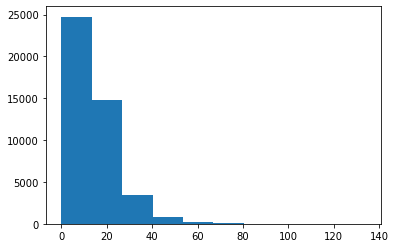

In [6]:
number_column = df.loc[:,'all_avg_wait']
waiting_time = number_column.values
plt.hist(waiting_time)
plt.show()

In [6]:
X = df.iloc[:,22:32]
y = df.iloc[:,-1] 

In [7]:
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features


           Specs         Score
0     passengers  1.095464e+06
2         booths  2.476880e+03
1        flights  2.333207e+03
5  early morning  5.939148e+02
9   late evening  4.261540e+02
8  early evening  3.512501e+02
7      afternoon  3.197652e+02


[0.69964384 0.05533872 0.18942612 0.00590618 0.00110456 0.01778295
 0.00461202 0.00836982 0.01216134 0.00565444]


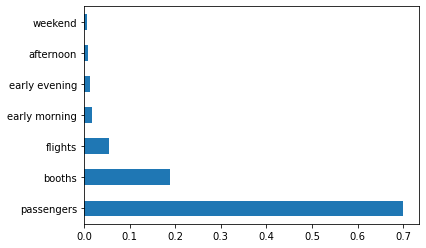

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [5]:
X = df[[ "non_us", "us", "booths", "flights", "passengers", "early morning", "early evening"]].to_numpy()
y = df[['label']].to_numpy()
y = np.ravel(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X1 = df[[ "booths", "flights", "passengers", "early morning", "early evening"]].to_numpy()
y1 = df[['label']].to_numpy()
y1 = np.ravel(y1)

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=123)

In [9]:
tree_conf1 = np.array([[8242, 467], [3505, 1003]])

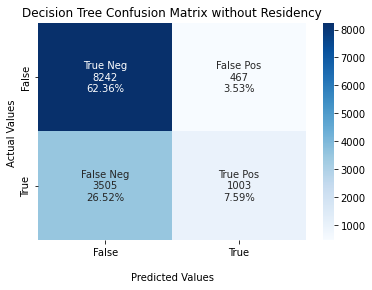

In [10]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
tree_conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
tree_conf1.flatten()/np.sum(tree_conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(tree_conf1, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix without Residency');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_list = []
index = []
knn_test_list = []
for i in range(100):
    index.append(i+ 1)
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i + 1))])
    pipe.fit(X_train, y_train)
    knn_test_list.append(pipe.score(X_test, y_test)) 
    knn_train_list.append(pipe.score(X_train, y_train)) 

Text(0.5, 1.0, 'KNN Hyperparameter Tuning with residency')

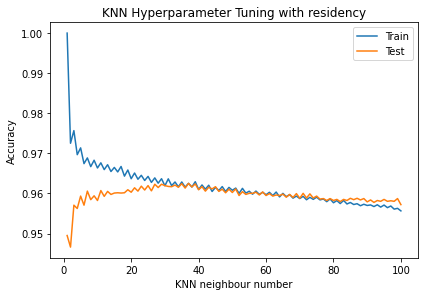

In [13]:
plt.plot(index, knn_train_list, label='Train')
plt.plot(index, knn_test_list, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('KNN neighbour number')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title("KNN Hyperparameter Tuning with residency")

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_list1 = []
index1 = []
knn_test_list1 = []
for i in range(100):
    index1.append(i+ 1)
    pipe1 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i + 1))])
    pipe1.fit(X1_train, y1_train)
    knn_test_list1.append(pipe1.score(X1_test, y1_test)) 
    knn_train_list1.append(pipe1.score(X1_train, y1_train)) 

Text(0.5, 1.0, 'KNN Hyperparameter Tuning without residency')

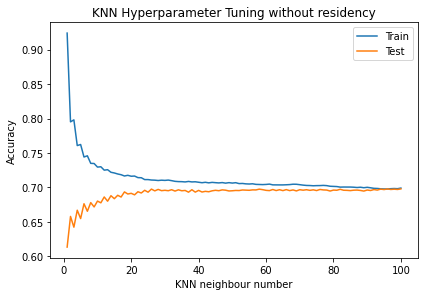

In [15]:
plt.plot(index1, knn_train_list1, label='Train')
plt.plot(index1, knn_test_list1, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('KNN neighbour number')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.title("KNN Hyperparameter Tuning without residency")

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123, criterion= "gini", max_depth = 6)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state=123, criterion= "gini", max_depth = 5)
tree1.fit(X1_train, y1_train)
y_pred_tree1 = tree1.predict(X1_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators = 50, random_state=123)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators = 100, random_state=123)
forest1.fit(X1_train, y1_train)
y_pred_forest1 = forest1.predict(X1_test)

In [13]:
from xgboost import XGBClassifier

boost = XGBClassifier(learning_rate= 0.1, max_depth= 5, random_state=123, verbosity=0, use_label_encoder=False)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

In [12]:
from xgboost import XGBClassifier
boost1 = XGBClassifier(learning_rate= 0.1, max_depth= 5, random_state=123, verbosity=0, use_label_encoder=False)
boost1.fit(X1_train, y1_train)
y_pred_boost1 = boost1.predict(X1_test)

Logistic: f1=0.336 auc=0.566


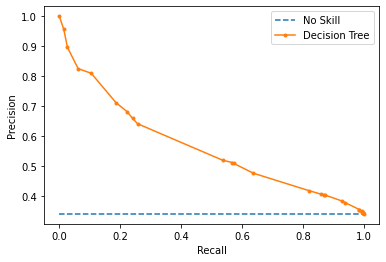

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
tree_probs = tree1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
tree_probs = tree_probs[:, 1]
# predict class values
yhat = tree1.predict(X1_test)
tree_precision, tree_recall, _ = precision_recall_curve(y1_test, tree_probs)
tree_f1, tree_auc = f1_score(y1_test, yhat), auc(tree_recall, tree_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (tree_f1, tree_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(tree_recall, tree_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.400 auc=0.574


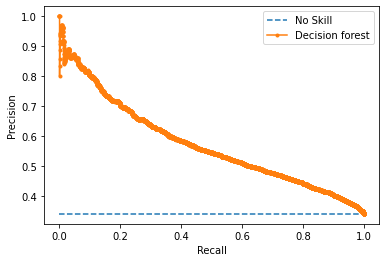

In [22]:
# predict probabilities
forest_probs = forest1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
forest_probs = forest_probs[:, 1]
# predict class values
yhat = forest1.predict(X1_test)
forest_precision, forest_recall, _ = precision_recall_curve(y1_test, forest_probs)
forest_f1, forest_auc = f1_score(y1_test, yhat), auc(forest_recall, forest_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (forest_f1, forest_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(forest_recall, forest_precision, marker='.', label='Decision forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.424 auc=0.575


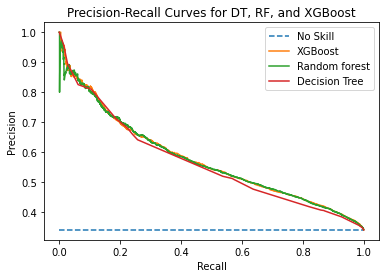

In [26]:
# predict probabilities
boost_probs = boost1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
boost_probs = boost_probs[:, 1]
# predict class values
yhat = boost1.predict(X1_test)
boost_precision, boost_recall, _ = precision_recall_curve(y1_test, boost_probs)
boost_f1, boost_auc = f1_score(y1_test, yhat), auc(boost_recall, boost_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (boost_f1, boost_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(boost_recall, boost_precision,label='XGBoost')
pyplot.plot(forest_recall, forest_precision,label='Random forest')
pyplot.plot(tree_recall, tree_precision, label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curves for DT, RF, and XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

(13217,)

In [43]:
print(Tneg, Tpos, Fneg, Fpos)

10772 1873 155 417


In [23]:
Tneg = 0
Tpos = 0
Fneg = 0
Fpos = 0
for i,j in zip(y_pred_forest1, y_pred_boost1):
    if i == 0 and j == 0:
        Tneg += 1
    elif i == 0 and j == 1:
        Fpos += 1
    elif i == 1 and j == 0:
        Fneg += 1
    else:
        Tpos += 1


In [42]:
index = 0
for  i in y1_test:
    if i == 1:
        index +=1
print(index)

4508


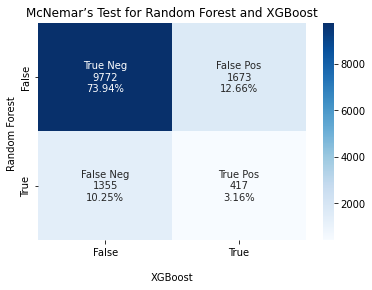

In [11]:
table = np.array([[9772, 1673], [1355, 417]])
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
table.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
table.flatten()/np.sum(table)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(table, annot=labels, fmt='', cmap='Blues')
ax.set_title('McNemar’s Test for Random Forest and XGBoost');
ax.set_xlabel('\nXGBoost')
ax.set_ylabel('Random Forest ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
from statsmodels.stats.contingency_tables import mcnemar
stat, p = mcnemar(table, exact=True)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1)
    tree.fit(X_train, y_train)
    tree_test_list.append(tree.score(X_test, y_test)) 
    tree_train_list.append(tree.score(X_train, y_train)) 

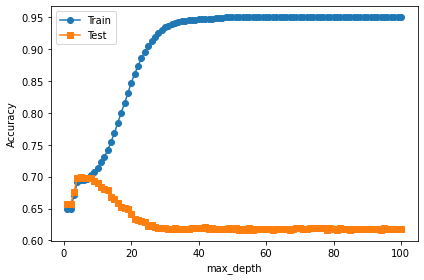

In [ ]:
plt.plot(index, tree_train_list, marker='o', label='Train')
plt.plot(index, tree_test_list, marker='s', label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [ ]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=123)

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 69.36%
Best Params: {'criterion': 'entropy', 'max_depth': 9}
Test Accuracy: 69.37%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc = cross_val_score(estimator=gs.best_estimator_,
                         X=X_train,
                         y=y_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

from mlxtend.evaluate import bootstrap_point632_score


cv_acc = bootstrap_point632_score(estimator=gs.best_estimator_,
                                  X=X_train,
                                  y=y_train,
                                  random_seed=99)

print('OOB Bootstrap Accuracy: %.2f%%' % (np.mean(cv_acc)*100))

Kfold Accuracy: 69.14%
OOB Bootstrap Accuracy: 69.17%


In [ ]:
from mlxtend.evaluate import bootstrap_point632_score
import numpy as np


# Compute Out-of-bag Bootstrap
scores = bootstrap_point632_score(gs.best_estimator_, X, y, method='oob', random_seed = 1)


# Compute accuracy (average over the bootstrap rounds)
acc = np.mean(scores)
print('Accuracy: %.2f%%' % (100*acc))

# Compute the 95% confidence interval around the accuracy estimate
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (lower, upper))

Accuracy: 69.12%
95% Confidence interval: [0.69, 0.70]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=123)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 10, 50, 100]
}

gs = GridSearchCV(estimator=forest,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 69.88%
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
Test Accuracy: 70.12%


In [ ]:
cv_acc = cross_val_score(estimator=gs.best_estimator_,
                         X=X_train,
                         y=y_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc)*100))


Kfold Accuracy: 69.85%


In [ ]:
# Compute Out-of-bag Bootstrap
scores = bootstrap_point632_score(gs.best_estimator_, X, y, method='oob', random_seed = 1)


# Compute accuracy (average over the bootstrap rounds)
acc = np.mean(scores)
print('Accuracy: %.2f%%' % (100*acc))

# Compute the 95% confidence interval around the accuracy estimate
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (lower, upper))

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    knn = KNeighborsClassifier(n_neighbors=i + 1)
    knn.fit(X_train, y_train)
    tree_test_list.append(knn.score(X_test, y_test)) 
    tree_train_list.append(knn.score(X_train, y_train)) 

In [ ]:
plt.plot(index, tree_train_list, marker='o', label='Train')
plt.plot(index, tree_test_list, marker='s', label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [16]:
from sklearn.linear_model import LogisticRegression

log_res = LogisticRegression(random_state=123, C = 0.001)

log_res.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = log_res.predict(X_test)
print(mean_squared_error(y_test, y_pred))

print('Test Accuracy: %.2f%%' % (log_res.score(X_test, y_test)*100))

0.041339936717567756
Test Accuracy: 95.87%


/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
log_res = LogisticRegression(random_state=123, C = 1)

log_res.fit(X1_train, y1_train)
from sklearn.metrics import mean_squared_error
y_pred1 = log_res.predict(X1_test)
print(mean_squared_error(y1_test, y_pred1))

print('Test Accuracy: %.2f%%' % (log_res.score(X1_test, y1_test)*100))

0.3021865778921086
Test Accuracy: 69.78%


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.992


/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


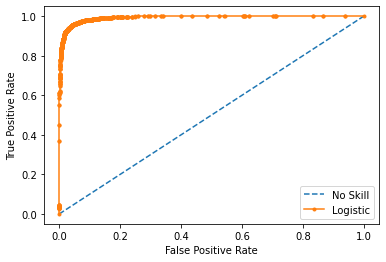

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
log_res = LogisticRegression(random_state=123, C = 0.001)
log_res.fit(X_train, y_train)
lr_probs = log_res.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.691


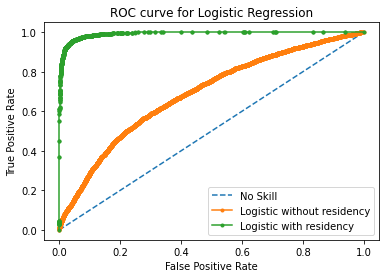

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(y1_test))]
log_res1 = LogisticRegression(random_state=123, C = 0.001)
log_res1.fit(X1_train, y1_train)
lr_probs1 = log_res1.predict_proba(X1_test)
lr_probs1 = lr_probs1[:, 1]
# calculate scores
ns_auc1 = roc_auc_score(y1_test, ns_probs1)
lr_auc1 = roc_auc_score(y1_test, lr_probs1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc1))
print('Logistic: ROC AUC=%.3f' % (lr_auc1))
# calculate roc curves
ns_fpr1, ns_tpr1, _ = roc_curve(y1_test, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(y1_test, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic without residency')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic with residency')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("ROC curve for Logistic Regression")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()